In [87]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve

In [61]:
# ---- START OF EDA ---- #

In [62]:
df = pd.read_csv("Sms.csv", sep=';', on_bad_lines = 'skip')

In [63]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [64]:
df['label'].value_counts()

ham     4487
spam     746
Name: label, dtype: int64

<AxesSubplot:title={'center':'Target Data'}>

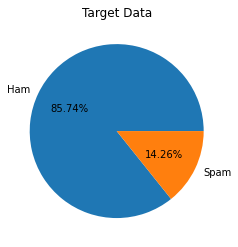

In [65]:
df['label'].value_counts().plot(kind='pie',labels=['Ham','Spam'],autopct='%.2f%%',ylabel='',title='Target Data')

In [66]:
df_ham = df[df['label'] == "ham"]
df_ham_count = df_ham['text'].str.split().str.len()
df_ham_count.index = df_ham_count.index.astype(str) + ' words:'
df_ham_count.sort_index(inplace=True)

In [67]:
df_spam = df[df['label'] == "spam"]
df_spam_count = df_spam['text'].str.split().str.len()
df_spam_count.index = df_spam_count.index.astype(str) + ' words:'
df_spam_count.sort_index(inplace=True)

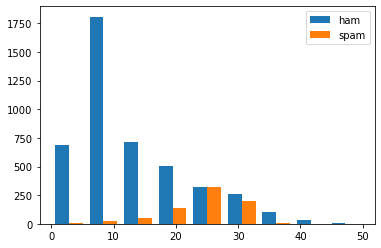

In [68]:
bins = np.linspace(0, 50, 10)

plt.hist([df_ham_count, df_spam_count], bins, label=['ham', 'spam'])
plt.legend(loc='upper right')
plt.show()

In [69]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ABHISHEH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
df['no_of_words']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [71]:
print(df['no_of_words'])

0       24
1        8
2       37
3       13
4       15
        ..
5228    35
5229     9
5230    15
5231    27
5232     7
Name: no_of_words, Length: 5233, dtype: int64


In [72]:
df['no_of_chars']=df['text'].apply(len)

In [73]:
df.head()

,label,text,no_of_words,no_of_chars
0,ham,"Go until jurong point, crazy.. Available only ...",24,111
1,ham,Ok lar... Joking wif u oni...,8,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,37,155
3,ham,U dun say so early hor... U c already then say...,13,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",15,61


In [74]:
df['label']=df['label'].apply(lambda x: 1 if x=='ham' else 0)

In [75]:
df.head()

,label,text,no_of_words,no_of_chars
0,1,"Go until jurong point, crazy.. Available only ...",24,111
1,1,Ok lar... Joking wif u oni...,8,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,37,155
3,1,U dun say so early hor... U c already then say...,13,49
4,1,"Nah I don't think he goes to usf, he lives aro...",15,61


<AxesSubplot:>

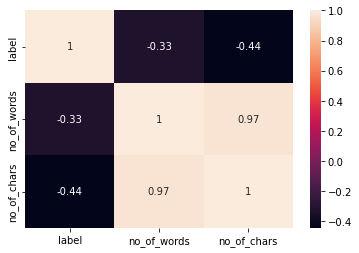

In [76]:
sns.heatmap(df.corr(),annot=True)

In [77]:
# ---- END OF EDA ---- #

In [78]:
# ---- PRE PROCESSING ---- #

In [79]:
def nlp_pre(text):
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer
    ps = PorterStemmer()

    # lower casing 
    text = text.lower()
    
    # tokenization
    text = nltk.word_tokenize(text)
    
    # removing special chars
    
    ls = []
    for i in text:
        if i.isalnum():
            ls.append(i)
    
    ls2 = []
    
    # remove stopwords
    for i in ls:
        if i not in stopwords.words('english'):
            ls2.append(i) 

    ls3 = []
    # apply stemming
    for i in ls2:
        ls3.append(ps.stem(i))
    
    return " ".join(ls3)

In [80]:
df['pre_processed']=df['text'].apply(nlp_pre)

In [81]:
# ---- END OF PRE PROCESSING ---- #

In [82]:
# ---- CLASSIFICATION ---- #

In [83]:
#70-30 split
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['pre_processed']).toarray()
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

              precision    recall  f1-score   support

           0       0.98      0.81      0.89       220
           1       0.97      1.00      0.98      1350

    accuracy                           0.97      1570
   macro avg       0.98      0.91      0.94      1570
weighted avg       0.97      0.97      0.97      1570



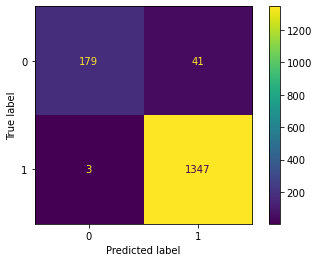

In [88]:
# SVM 
svm = svm.SVC(C=1000)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test) 

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.show()
